## Task 1: Import packages and Load data

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
filename = input('Please key in the filename: ')
df = pd.read_csv(filename)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186845,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
186846,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
186847,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
186848,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"


## Task 2: Clean and Preprocess data

### Task 2.1: Merge 12-month data

In [4]:
path = '/Users/admin/Desktop/Python_MacPro/sales_reporting/data_analytics_problems/SalesAnalysis/Sales_Data/'

frames = []
all_length = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
        length_1month = len(df1.index)
        all_length.append(length_1month)

result.to_csv('annualSales2019.csv', index=False)

### Task 2.2: Add 'Month' column

In [5]:
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


### Task 2.3: Get rid of 'NaN' and 'Or' value

In [6]:
df = df.dropna(how='all')
df = df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


## Task 3: Reporting

### Task 3.1: What was the best month for sales? How much was earned that month?

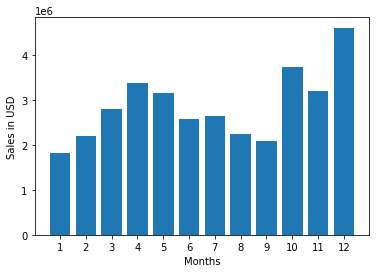

In [7]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)
df.groupby('Month').sum()['Sales']
sales_value = df.groupby('Month').sum()['Sales']
months = range(1,13)
plt.bar(x=months, height=sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

### Task 3.2: What city has the best sales?

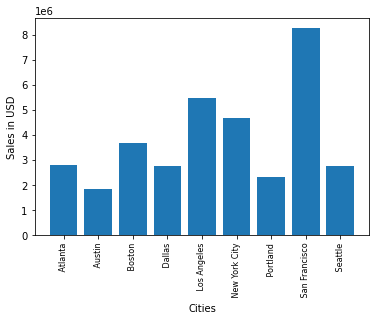

In [8]:
address_to_city = lambda address:address.split(',')[1]
df['City'] = df['Purchase Address'].apply(address_to_city)
df.groupby('City').sum()['Sales']
sales_value_city = df.groupby('City').sum()['Sales']
cities = [city for city, sales in sales_value_city.items()]
plt.bar(x=cities, height=sales_value_city)
plt.xticks(cities, rotation=90, size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

### Task 3.3: What time should we display ads to maximize the likelihood of customer’s buying product?

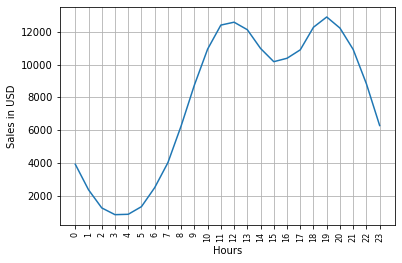

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hours'] = df['Order Date'].dt.hour
sales_value_hours = df.groupby('Hours').count()['Sales']
hours = [hour for hour, sales in sales_value_hours.items()]
plt.plot(hours, sales_value_hours)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

In [10]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
groupProduct = lambda product: ', '.join(product)
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup['All Products'].value_counts().head(10)

iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: All Products, dtype: int64

### Task 3.4: What products are most often sold together?

### Task 3.5: What product sold the most? Why do you think it sold the most?

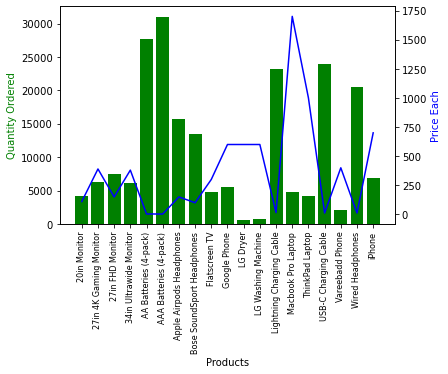

In [11]:
all_products = df.groupby('Product').sum()['Quantity Ordered']
prices = df.groupby('Product').mean()['Price Each']
products_ls = [product for product, quant in all_products.items()]

x = products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()